In [ ]:
import pandas as pd

df=pd.read_csv("/content/Mall_Customers.csv")

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


df = pd.read_csv("Mall_Customers.csv")


df['Gender'] = LabelEncoder().fit_transform(df['Gender'])


bins = [17, 25, 35, 45, 55, 100]
labels = [0, 1, 2, 3, 4]
df['AgeRange'] = pd.cut(df['Age'], bins=bins, labels=labels)

In [ ]:
X_2d = df[['Annual Income (k$)', 'Spending Score (1-100)']].values
X_2d = StandardScaler().fit_transform(X_2d)

dbscan_2d = DBSCAN(eps=0.5, min_samples=5).fit(X_2d)
labels_2d = dbscan_2d.labels_


n_clusters_2d = len(set(labels_2d)) - (1 if -1 in labels_2d else 0)
n_noise_2d = list(labels_2d).count(-1)
print("2D Clustering Results:")
print(f"Clusters found: {n_clusters_2d}")
print(f"Noise points: {n_noise_2d}\n")


centroids_2d = []
for cluster in set(labels_2d):
    if cluster != -1:
        points = X_2d[labels_2d == cluster]
        centroids_2d.append(points.mean(axis=0))
centroids_2d = np.array(centroids_2d)




2D Clustering Results:
Clusters found: 2
Noise points: 8



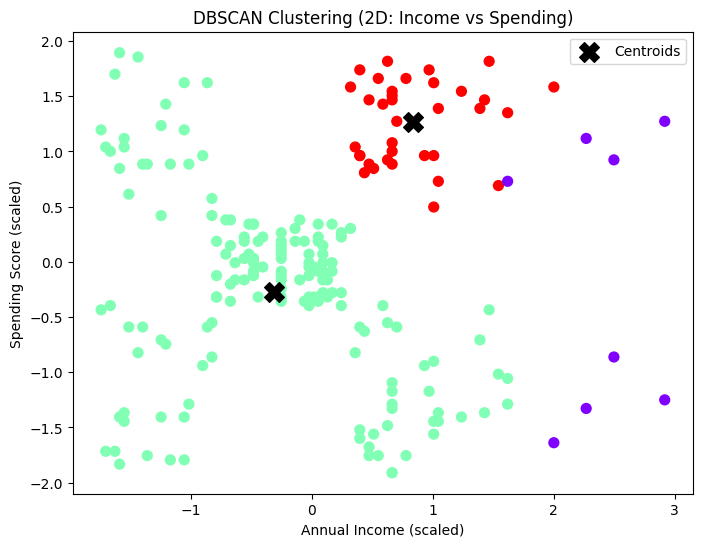

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X_2d[:,0], X_2d[:,1], c=labels_2d, cmap="rainbow", s=50)
if len(centroids_2d) > 0:
    plt.scatter(centroids_2d[:,0], centroids_2d[:,1], c="black", marker="X", s=200, label="Centroids")
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.title("DBSCAN Clustering (2D: Income vs Spending)")
plt.legend()
plt.show()

In [ ]:
X_3d = df[['AgeRange', 'Annual Income (k$)', 'Spending Score (1-100)']].values
X_3d = StandardScaler().fit_transform(X_3d)

dbscan_3d = DBSCAN(eps=0.7, min_samples=5).fit(X_3d)
labels_3d = dbscan_3d.labels_


n_clusters_3d = len(set(labels_3d)) - (1 if -1 in labels_3d else 0)
n_noise_3d = list(labels_3d).count(-1)
print("3D Clustering Results:")
print(f"Clusters found: {n_clusters_3d}")
print(f"Noise points: {n_noise_3d}\n")


centroids_3d = []
for cluster in set(labels_3d):
    if cluster != -1:
        points = X_3d[labels_3d == cluster]
        centroids_3d.append(points.mean(axis=0))
centroids_3d = np.array(centroids_3d)




3D Clustering Results:
Clusters found: 6
Noise points: 27



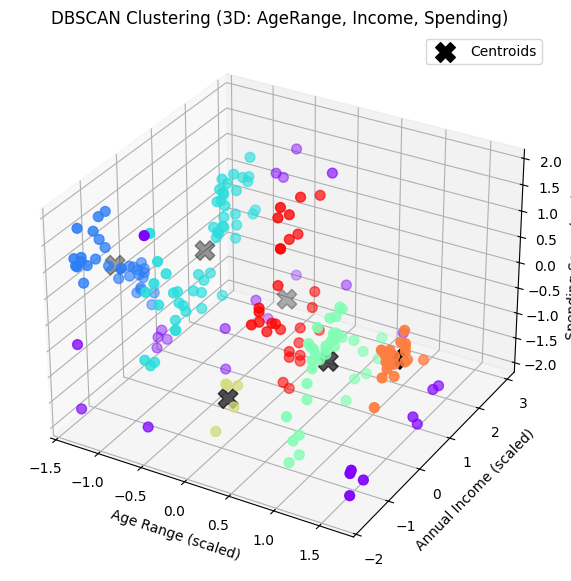

In [ ]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X_3d[:,0], X_3d[:,1], X_3d[:,2], c=labels_3d, cmap="rainbow", s=50)
if len(centroids_3d) > 0:
    ax.scatter(centroids_3d[:,0], centroids_3d[:,1], centroids_3d[:,2], c="black", marker="X", s=200, label="Centroids")
ax.set_xlabel("Age Range (scaled)")
ax.set_ylabel("Annual Income (scaled)")
ax.set_zlabel("Spending Score (scaled)")
ax.set_title("DBSCAN Clustering (3D: AgeRange, Income, Spending)")
plt.legend()
plt.show()

Combined Clustering Results:
Clusters found: 7
Noise points: 29



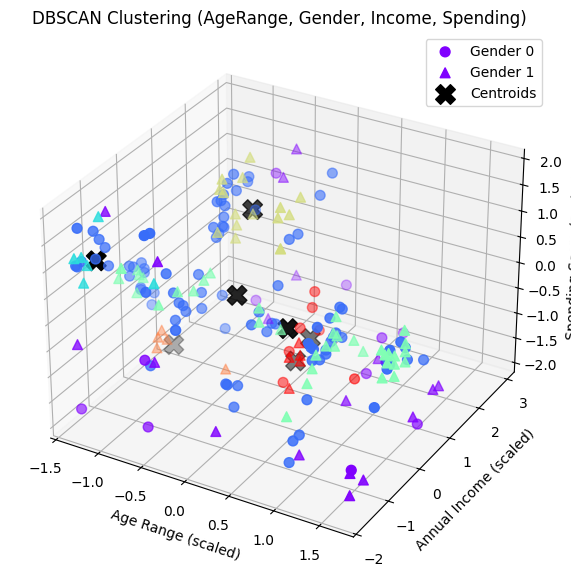

In [ ]:





bins = [17, 25, 35, 45, 55, 100]
labels = [0, 1, 2, 3, 4]
df['AgeRange'] = pd.cut(df['Age'], bins=bins, labels=labels)


X_all = df[['AgeRange', 'Gender', 'Annual Income (k$)', 'Spending Score (1-100)']].values
X_all = StandardScaler().fit_transform(X_all)


dbscan_all = DBSCAN(eps=0.8, min_samples=5).fit(X_all)
labels_all = dbscan_all.labels_


n_clusters_all = len(set(labels_all)) - (1 if -1 in labels_all else 0)
n_noise_all = list(labels_all).count(-1)
print("Combined Clustering Results:")
print(f"Clusters found: {n_clusters_all}")
print(f"Noise points: {n_noise_all}\n")


centroids_all = []
for cluster in set(labels_all):
    if cluster != -1:
        points = X_all[labels_all == cluster]
        centroids_all.append(points.mean(axis=0))
centroids_all = np.array(centroids_all)


fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')


for gender in [0, 1]:
    mask = df['Gender'] == gender
    ax.scatter(X_all[mask,0], X_all[mask,2], X_all[mask,3],
               c=labels_all[mask], cmap="rainbow",
               s=50, marker="o" if gender==0 else "^", label=f"Gender {gender}")


if len(centroids_all) > 0:
    ax.scatter(centroids_all[:,0], centroids_all[:,2], centroids_all[:,3],
               c="black", marker="X", s=200, label="Centroids")

ax.set_xlabel("Age Range (scaled)")
ax.set_ylabel("Annual Income (scaled)")
ax.set_zlabel("Spending Score (scaled)")
ax.set_title("DBSCAN Clustering (AgeRange, Gender, Income, Spending)")
ax.legend()
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score


labels = dbscan_all.labels_


mask = labels != -1
if len(set(labels)) > 1 and sum(mask) > 1:
    sil_score = silhouette_score(X_2d[mask], labels[mask])
    print(f"Silhouette Score: {sil_score:.3f}")
else:
    print("Silhouette score cannot be computed (only one cluster or too many noise points).")


Silhouette Score: -0.111


In [ ]:
from sklearn.metrics import silhouette_score


labels = dbscan_all.labels_


mask = labels != -1
if len(set(labels)) > 1 and sum(mask) > 1:
    sil_score = silhouette_score(X_3d[mask], labels[mask])
    print(f"Silhouette Score: {sil_score:.3f}")
else:
    print("Silhouette score cannot be computed (only one cluster or too many noise points).")


Silhouette Score: -0.085
